In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random
random.seed(42)

As we above we have imported some of required libraries.
**Numpy** for numerical problems,
**pandas** for file importing and all stuff,
**cv2** for to convert given image into an array,
**random** for to shuffle data randomly. 

In [ ]:
# import datetime
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
# %load_ext tensorboard

Now we have  imported
 **sklearn  and from sklearn model selection we import train_test_split for spliting a data.
we imported **tensorflow** and **keras** and imported sequential model,
We have imported **EarlyStoping** so that model stoped training itself where it got best accuracy,
we imported **dense** layer for neural networks'layer,**Dropout** to avoid overfitting and **flatten** to flatten the data

In [2]:
# cloning the Datasets repository
!git clone https://github.com/dphi-official/Datasets.git

Cloning into 'Datasets'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 10211 (delta 17), reused 50 (delta 9), pack-reused 10147
Receiving objects: 100% (10211/10211), 532.64 MiB | 28.72 MiB/s, done.
Resolving deltas: 100% (207/207), done.
Checking out files: 100% (9431/9431), done.


In [ ]:
# copying the contents of the animal data folder to Google Drive
!cp -r Datasets/animal_data /content/animal_data/

# unzipping the contents of training folders 
!unzip animal_data/train_beg.zip

Archive:  animal_data/train_beg.zip
replace train_beg/Image_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: train_beg/Image_1.jpg   
  inflating: train_beg/Image_10.jpg  
  inflating: train_beg/Image_100.jpg  
  inflating: train_beg/Image_1000.jpg  
  inflating: train_beg/Image_1001.jpg  
  inflating: train_beg/Image_1002.jpg  
  inflating: train_beg/Image_1003.jpg  
  inflating: train_beg/Image_1004.jpg  
  inflating: train_beg/Image_1005.jpg  
  inflating: train_beg/Image_1006.jpg  
  inflating: train_beg/Image_1007.jpg  
  inflating: train_beg/Image_1008.jpg  
  inflating: train_beg/Image_1009.jpg  
  inflating: train_beg/Image_101.jpg  
  inflating: train_beg/Image_1010.jpg  
  inflating: train_beg/Image_1011.jpg  
  inflating: train_beg/Image_1012.jpg  
  inflating: train_beg/Image_1013.jpg  
  inflating: train_beg/Image_1014.jpg  
  inflating: train_beg/Image_1015.jpg  
  inflating: train_beg/Image_1016.jpg  
  inflating: train_beg/Image_1017.jpg  
  inflating: train_

From above code we have imported zip file and unzip the zip file 

In [ ]:
Training_set_animals = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/animal_data/Training_set_animals.csv')
Training_set_animals.head()

,filename,animal_type
0,Image_1.jpg,mucca
1,Image_2.jpg,mucca
2,Image_3.jpg,mucca
3,Image_4.jpg,mucca
4,Image_5.jpg,mucca


In [ ]:
# checking no. of classes

Training_set_animals['animal_type'].unique()

array(['mucca', 'pecora'], dtype=object)

In [ ]:
# getting the path of all image files
filepaths = ['/content/train_beg/' + fname[:-4] + '.jpg' for fname in Training_set_animals['filename']]
filepaths 

['/content/train_beg/Image_1.jpg',
 '/content/train_beg/Image_2.jpg',
 '/content/train_beg/Image_3.jpg',
 '/content/train_beg/Image_4.jpg',
 '/content/train_beg/Image_5.jpg',
 '/content/train_beg/Image_6.jpg',
 '/content/train_beg/Image_7.jpg',
 '/content/train_beg/Image_8.jpg',
 '/content/train_beg/Image_9.jpg',
 '/content/train_beg/Image_10.jpg',
 '/content/train_beg/Image_11.jpg',
 '/content/train_beg/Image_12.jpg',
 '/content/train_beg/Image_13.jpg',
 '/content/train_beg/Image_14.jpg',
 '/content/train_beg/Image_15.jpg',
 '/content/train_beg/Image_16.jpg',
 '/content/train_beg/Image_17.jpg',
 '/content/train_beg/Image_18.jpg',
 '/content/train_beg/Image_19.jpg',
 '/content/train_beg/Image_20.jpg',
 '/content/train_beg/Image_21.jpg',
 '/content/train_beg/Image_22.jpg',
 '/content/train_beg/Image_23.jpg',
 '/content/train_beg/Image_24.jpg',
 '/content/train_beg/Image_25.jpg',
 '/content/train_beg/Image_26.jpg',
 '/content/train_beg/Image_27.jpg',
 '/content/train_beg/Image_28.jpg',
 

as we have seen above to get the path of all images

In [ ]:
# Confirm if number of images is same as number of labels given
if len(Training_set_animals) == len(filepaths):
    print('Number of labels i.e. ', len(Training_set_animals), 'matches the number of filenames i.e. ', len(filepaths))
else:
    print('Number of labels does not matches the number of filenames')

Number of labels i.e.  1200 matches the number of filenames i.e.  1200


As we have seen above that number of label matches with  file name hence we are doing perfectly fine till now.

In [ ]:
Training_set_animals['filepath'] = filepaths

In [ ]:
Training_set_animals.head() # head method is used to call first five row of dataset

,filename,animal_type,filepath
0,Image_1.jpg,mucca,/content/train_beg/Image_1.jpg
1,Image_2.jpg,mucca,/content/train_beg/Image_2.jpg
2,Image_3.jpg,mucca,/content/train_beg/Image_3.jpg
3,Image_4.jpg,mucca,/content/train_beg/Image_4.jpg
4,Image_5.jpg,mucca,/content/train_beg/Image_5.jpg


In [ ]:
# plotting some images

img_array = cv2.imread(Training_set_animals['filepath'][30]) 


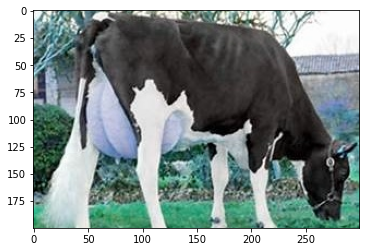

In [ ]:
plt.imshow(img_array)

we have imported just random photo

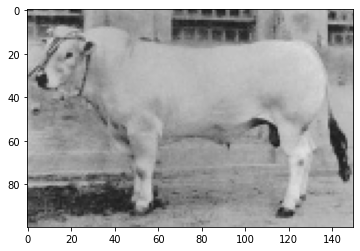

In [ ]:
img_array = cv2.imread(Training_set_animals['filepath'][138]) 
new_array = cv2.resize(img_array, (150, 100))
plt.imshow(new_array)

we just seen image by doing resize into(150,100)

In [ ]:
resize_and_rescale = tf.keras.Sequential([ 
  tf.keras.layers.experimental.preprocessing.Resizing(75, 50),
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.CenterCrop(75, 50), 
  tf.keras.layers.experimental.preprocessing.RandomContrast(0.2), 
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
])

# log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# tensorboard_callback = TensorBoard(log_dir = log_dir, histogram_freq=1)

# earlystopping_callback = EarlyStopping(
#     monitor = 'val_loss', min_delta = 0, patience = 3, verbose = 0, mode = 'auto',
#     baseline = None, restore_best_weights = True
# )

we have done data augmentation  to do some editing in images so that its fit well to our training data

In [ ]:
v_training_data = []

def create_training_data():
  for i in range(Training_set_animals.shape[0]):
    img_array = cv2.imread(Training_set_animals['filepath'][i])
    new_array = cv2.resize(img_array, (75, 50))
    v_training_data.append([new_array, 0 if Training_set_animals['animal_type'][i] == 'mucca' else 1])
  random.shuffle(v_training_data)

create_training_data()

now we added value to training_data

In [ ]:
# splitting features and labels

vX = []
vy = []

for features, label in v_training_data:
  vX.append(features)
  vy.append(label)

vX = np.array(vX)
vy = np.array(vy)

store values in vx and vy

In [ ]:
vX.shape, vy.shape

((1200, 50, 75, 3), (1200,))

In [ ]:
# splitting into train and test

vX_train, vX_test, vy_train, vy_test = train_test_split(vX, vy, test_size = 0.2, random_state = 42)

print('X_train.shape :', vX_train.shape, ', y_train.shape :',  vy_train.shape)
print('X_train.shape :', vX_test.shape, ', y_train.shape :',  vy_test.shape)

X_train.shape : (960, 50, 75, 3) , y_train.shape : (960,)
X_train.shape : (240, 50, 75, 3) , y_train.shape : (240,)


In [ ]:
vX_train = vX_train / 255. 
vX_test = vX_test / 255.

Simple Neural Network

In [ ]:
model =  Sequential()
model.add(resize_and_rescale)

model.add(Flatten())

model.add(Dense(512,input_shape=(50,75),activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(512,activation = 'relu'))
model.add(Dense(256,activation = 'relu'))
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation = 'relu'))

model.add(Dense(16,activation = 'relu'))
model.add(Dense(8,activation = 'relu'))

model.add(Dense(1,activation='sigmoid'))
    

In [ ]:

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.3), loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:

model.fit(vX_train,vy_train,epochs=10,batch_size=5,validation_split=0.15)


Epoch 1/10
164/164 [==============================] - 5s 31ms/step - loss: 98009.8516 - accuracy: 0.4718 - val_loss: 0.6967 - val_accuracy: 0.5069
Epoch 2/10
164/164 [==============================] - 5s 30ms/step - loss: 0.6985 - accuracy: 0.5049 - val_loss: 0.6980 - val_accuracy: 0.5069
Epoch 3/10
164/164 [==============================] - 5s 30ms/step - loss: 0.7050 - accuracy: 0.5025 - val_loss: 0.7045 - val_accuracy: 0.5069
Epoch 4/10
164/164 [==============================] - 5s 30ms/step - loss: 0.7084 - accuracy: 0.4914 - val_loss: 0.6936 - val_accuracy: 0.4931
Epoch 5/10
164/164 [==============================] - 5s 30ms/step - loss: 0.7028 - accuracy: 0.5159 - val_loss: 0.7143 - val_accuracy: 0.5069
Epoch 6/10
164/164 [==============================] - 5s 30ms/step - loss: 0.7171 - accuracy: 0.5049 - val_loss: 0.7021 - val_accuracy: 0.5069
Epoch 7/10
164/164 [==============================] - 5s 30ms/step - loss: 0.7022 - accuracy: 0.5159 - val_loss: 0.7061 - val_accuracy: 0.

***VGG***

---



---



---



In [ ]:
# define input shape
INPUT_SHAPE = vX_train.shape[1:]

# get the VGG19 model
vgg_layers = tf.keras.applications.vgg19.VGG19(weights='imagenet', include_top=False, 
                                               input_shape=INPUT_SHAPE)

vgg_layers.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 50, 75, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 50, 75, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 50, 75, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 25, 37, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 25, 37, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 25, 37, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 18, 128)       0     

In [ ]:
# Fine-tune all the layers
for layer in vgg_layers.layers:
    layer.trainable = True # it means that our layers are trainable 

# Check the trainable status of the individual layers
for layer in vgg_layers.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7feb15af8a20> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7feb158c8fd0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7feb1599f048> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7feb158ba860> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7feb158eb908> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7feb158c8630> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7feb1584d2b0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7feb15847b38> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7feb158470b8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7feb15856550> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7feb15856c18> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7feb15863

In [ ]:
# define sequential model
model = tf.keras.models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_layers)

# add flatten layer
model.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))

# add output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# view model layers
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 2, 512)         20024384  
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               262400    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                

In [ ]:
EPOCHS = 100
# train_images_3ch_scaled = train_images_3ch / 255.
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, 
                                               restore_best_weights=True,
                                               verbose=1)

history = model.fit(vX_train, vy_train,
                    batch_size=32,
                    callbacks=[es_callback], 
                    validation_split=0.1, epochs=EPOCHS,
                    verbose=1)

Epoch 1/100
27/27 [==============================] - 161s 6s/step - loss: 0.7163 - accuracy: 0.5567 - val_loss: 0.6610 - val_accuracy: 0.5938
Epoch 2/100
27/27 [==============================] - 161s 6s/step - loss: 0.6037 - accuracy: 0.6701 - val_loss: 0.5578 - val_accuracy: 0.7083
Epoch 3/100
27/27 [==============================] - 164s 6s/step - loss: 0.4884 - accuracy: 0.7627 - val_loss: 1.0385 - val_accuracy: 0.5729
Epoch 4/100
27/27 [==============================] - 161s 6s/step - loss: 0.5016 - accuracy: 0.7720 - val_loss: 0.4421 - val_accuracy: 0.7917
Epoch 5/100
27/27 [==============================] - 161s 6s/step - loss: 0.3513 - accuracy: 0.8438 - val_loss: 0.4039 - val_accuracy: 0.7812
Epoch 6/100
27/27 [==============================] - 164s 6s/step - loss: 0.2811 - accuracy: 0.8843 - val_loss: 0.4501 - val_accuracy: 0.7812
Epoch 7/100
27/27 [==============================] - 161s 6s/step - loss: 0.1788 - accuracy: 0.9317 - val_loss: 0.4948 - val_accuracy: 0.7917
Epoch 

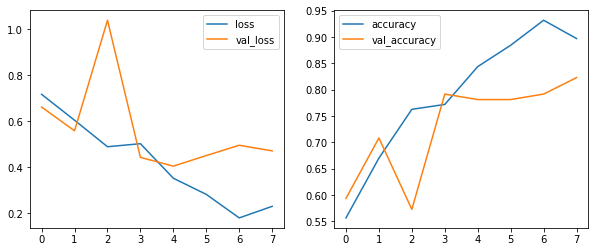

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1]);

In [ ]:
model.evaluate(vX_test, vy_test)

8/8 [==============================] - 9s 1s/step - loss: 0.3397 - accuracy: 0.8375


[0.3396884799003601, 0.8374999761581421]

Now till now we have done all the things to train our model now we have to do prediction and for that we have to import test data that is imported as follow

In [ ]:
!unzip animal_data/test_beg.zip

Archive:  animal_data/test_beg.zip
replace test_beg/Image_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: test_beg/Image_1.jpg    
  inflating: test_beg/Image_10.jpg   
  inflating: test_beg/Image_100.jpg  
  inflating: test_beg/Image_101.jpg  
  inflating: test_beg/Image_102.jpg  
  inflating: test_beg/Image_103.jpg  
  inflating: test_beg/Image_104.jpg  
  inflating: test_beg/Image_105.jpg  
  inflating: test_beg/Image_106.jpg  
  inflating: test_beg/Image_107.jpg  
  inflating: test_beg/Image_108.jpg  
  inflating: test_beg/Image_109.jpg  
  inflating: test_beg/Image_11.jpg   
  inflating: test_beg/Image_110.jpg  
  inflating: test_beg/Image_111.jpg  
  inflating: test_beg/Image_112.jpg  
  inflating: test_beg/Image_113.jpg  
  inflating: test_beg/Image_114.jpg  
  inflating: test_beg/Image_115.jpg  
  inflating: test_beg/Image_116.jpg  
  inflating: test_beg/Image_117.jpg  
  inflating: test_beg/Image_118.jpg  
  inflating: test_beg/Image_119.jpg  
  inflating: test_beg

In [ ]:
Testing_set_animals = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/animal_data/Testing_set_animals.csv",header=None)
Testing_set_animals.columns = ['file']
Testing_set_animals

,file
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg
...,...
395,Image_396.jpg
396,Image_397.jpg
397,Image_398.jpg
398,Image_399.jpg


In [ ]:

filepath = ['/content/test_beg/' + fname[:-4] + '.jpg' for fname in Testing_set_animals['file']]
filepath 

['/content/test_beg/Image_1.jpg',
 '/content/test_beg/Image_2.jpg',
 '/content/test_beg/Image_3.jpg',
 '/content/test_beg/Image_4.jpg',
 '/content/test_beg/Image_5.jpg',
 '/content/test_beg/Image_6.jpg',
 '/content/test_beg/Image_7.jpg',
 '/content/test_beg/Image_8.jpg',
 '/content/test_beg/Image_9.jpg',
 '/content/test_beg/Image_10.jpg',
 '/content/test_beg/Image_11.jpg',
 '/content/test_beg/Image_12.jpg',
 '/content/test_beg/Image_13.jpg',
 '/content/test_beg/Image_14.jpg',
 '/content/test_beg/Image_15.jpg',
 '/content/test_beg/Image_16.jpg',
 '/content/test_beg/Image_17.jpg',
 '/content/test_beg/Image_18.jpg',
 '/content/test_beg/Image_19.jpg',
 '/content/test_beg/Image_20.jpg',
 '/content/test_beg/Image_21.jpg',
 '/content/test_beg/Image_22.jpg',
 '/content/test_beg/Image_23.jpg',
 '/content/test_beg/Image_24.jpg',
 '/content/test_beg/Image_25.jpg',
 '/content/test_beg/Image_26.jpg',
 '/content/test_beg/Image_27.jpg',
 '/content/test_beg/Image_28.jpg',
 '/content/test_beg/Image_29.

In [ ]:
# Confirm if number of images is same as number of labels given
if len(Testing_set_animals) == len(filepath):
    print('Number of labels i.e. ', len(Testing_set_animals), 'matches the number of filenames i.e. ', len(filepath))
else:
    print('Number of labels does not matches the number of filenames')

Number of labels i.e.  400 matches the number of filenames i.e.  400


In [ ]:
test_images = [[fname,'/content/test_beg/' + fname[:-4] + '.jpg'] for fname in Testing_set_animals['file']]
test_images_df = pd.DataFrame(test_images)
test_images_df.columns = ['filename', 'file']

test_images_df

,filename,file
0,Image_1.jpg,/content/test_beg/Image_1.jpg
1,Image_2.jpg,/content/test_beg/Image_2.jpg
2,Image_3.jpg,/content/test_beg/Image_3.jpg
3,Image_4.jpg,/content/test_beg/Image_4.jpg
4,Image_5.jpg,/content/test_beg/Image_5.jpg
...,...,...
395,Image_396.jpg,/content/test_beg/Image_396.jpg
396,Image_397.jpg,/content/test_beg/Image_397.jpg
397,Image_398.jpg,/content/test_beg/Image_398.jpg
398,Image_399.jpg,/content/test_beg/Image_399.jpg


In [ ]:
mg_array = cv2.imread(test_images_df['file'][30]) 
mg_array

array([[[157, 195, 189],
        [149, 187, 181],
        [141, 179, 173],
        ...,
        [127, 174, 166],
        [124, 171, 163],
        [127, 174, 166]],

       [[155, 193, 187],
        [146, 184, 178],
        [139, 177, 171],
        ...,
        [124, 171, 163],
        [123, 170, 162],
        [126, 173, 165]],

       [[146, 185, 177],
        [141, 180, 172],
        [142, 181, 173],
        ...,
        [129, 176, 168],
        [132, 179, 171],
        [138, 185, 177]],

       ...,

       [[107, 154, 152],
        [ 97, 144, 142],
        [ 91, 135, 134],
        ...,
        [103, 162, 147],
        [108, 170, 154],
        [117, 179, 163]],

       [[105, 149, 150],
        [112, 156, 157],
        [113, 157, 158],
        ...,
        [ 99, 158, 143],
        [105, 164, 149],
        [112, 171, 156]],

       [[127, 171, 172],
        [118, 162, 163],
        [107, 151, 152],
        ...,
        [104, 163, 148],
        [114, 173, 158],
        [122, 181, 166]]

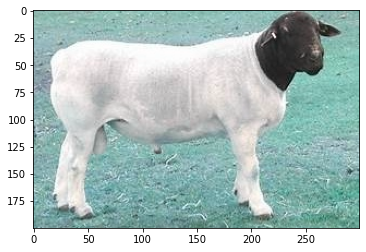

In [ ]:
plt.imshow(mg_array)

In [ ]:
testing_data = []

def create_testing_data():
  for i in range(len(test_images_df['file'])):
    img_array = cv2.imread(test_images_df['file'][i])
    new_array = cv2.resize(img_array, (75, 50))
    testing_data.append(new_array)
  
  

  



In [ ]:
img_array

array([[[ 82,  82,  82],
        [ 85,  85,  85],
        [ 77,  77,  77],
        ...,
        [179, 179, 179],
        [186, 186, 186],
        [191, 191, 191]],

       [[107, 107, 107],
        [ 90,  90,  90],
        [ 90,  90,  90],
        ...,
        [168, 168, 168],
        [173, 173, 173],
        [181, 181, 181]],

       [[184, 184, 184],
        [147, 147, 147],
        [142, 142, 142],
        ...,
        [164, 164, 164],
        [162, 162, 162],
        [162, 162, 162]],

       ...,

       [[114, 114, 114],
        [112, 112, 112],
        [119, 119, 119],
        ...,
        [187, 187, 187],
        [192, 192, 192],
        [198, 198, 198]],

       [[142, 142, 142],
        [128, 128, 128],
        [127, 127, 127],
        ...,
        [189, 189, 189],
        [194, 194, 194],
        [201, 201, 201]],

       [[155, 155, 155],
        [130, 130, 130],
        [115, 115, 115],
        ...,
        [189, 189, 189],
        [195, 195, 195],
        [203, 203, 203]]

In [ ]:
create_testing_data()

In [ ]:
testing_data

[array([[[ 89,  93,  84],
         [ 96,  91,  89],
         [202, 194, 195],
         ...,
         [ 71, 102, 131],
         [ 64,  97, 124],
         [103, 138, 163]],
 
        [[115, 110, 100],
         [ 91,  95,  91],
         [105, 110, 108],
         ...,
         [150, 188, 214],
         [117, 159, 184],
         [127, 173, 200]],
 
        [[ 68,  78,  72],
         [ 99, 105, 100],
         [ 67,  68,  65],
         ...,
         [153, 201, 224],
         [150, 196, 223],
         [141, 187, 218]],
 
        ...,
 
        [[ 41,  49,  58],
         [ 99, 109, 118],
         [113, 126, 136],
         ...,
         [ 81, 108, 119],
         [ 23,  42,  52],
         [ 68, 117, 128]],
 
        [[100, 123, 134],
         [ 91, 116, 130],
         [102, 128, 145],
         ...,
         [ 86, 116, 138],
         [ 27,  40,  56],
         [ 94, 124, 132]],
 
        [[110, 135, 149],
         [ 79, 100, 116],
         [ 68,  85, 102],
         ...,
         [100, 129, 141],
  

In [ ]:
x_unseen=np.array(testing_data)
x_unseen = x_unseen/255

In [ ]:
x_unseen

array([[[[0.34901961, 0.36470588, 0.32941176],
         [0.37647059, 0.35686275, 0.34901961],
         [0.79215686, 0.76078431, 0.76470588],
         ...,
         [0.27843137, 0.4       , 0.51372549],
         [0.25098039, 0.38039216, 0.48627451],
         [0.40392157, 0.54117647, 0.63921569]],

        [[0.45098039, 0.43137255, 0.39215686],
         [0.35686275, 0.37254902, 0.35686275],
         [0.41176471, 0.43137255, 0.42352941],
         ...,
         [0.58823529, 0.7372549 , 0.83921569],
         [0.45882353, 0.62352941, 0.72156863],
         [0.49803922, 0.67843137, 0.78431373]],

        [[0.26666667, 0.30588235, 0.28235294],
         [0.38823529, 0.41176471, 0.39215686],
         [0.2627451 , 0.26666667, 0.25490196],
         ...,
         [0.6       , 0.78823529, 0.87843137],
         [0.58823529, 0.76862745, 0.8745098 ],
         [0.55294118, 0.73333333, 0.85490196]],

        ...,

        [[0.16078431, 0.19215686, 0.22745098],
         [0.38823529, 0.42745098, 0.4627451 ]

Prediction based on vgg

In [ ]:
prediction = np.round(model.predict(x_unseen)).flatten().astype(int)
answer = ['mucca' if pred == 0 else 'pecora' for pred in  prediction]
print(answer)

['pecora', 'pecora', 'mucca', 'pecora', 'pecora', 'mucca', 'mucca', 'pecora', 'mucca', 'pecora', 'mucca', 'pecora', 'mucca', 'mucca', 'pecora', 'mucca', 'mucca', 'pecora', 'pecora', 'pecora', 'pecora', 'mucca', 'mucca', 'pecora', 'pecora', 'pecora', 'mucca', 'pecora', 'mucca', 'mucca', 'mucca', 'pecora', 'mucca', 'mucca', 'pecora', 'pecora', 'mucca', 'mucca', 'pecora', 'mucca', 'mucca', 'mucca', 'pecora', 'pecora', 'mucca', 'mucca', 'pecora', 'pecora', 'mucca', 'mucca', 'pecora', 'pecora', 'mucca', 'mucca', 'pecora', 'mucca', 'mucca', 'pecora', 'pecora', 'pecora', 'pecora', 'pecora', 'pecora', 'mucca', 'mucca', 'mucca', 'pecora', 'pecora', 'pecora', 'pecora', 'pecora', 'mucca', 'pecora', 'mucca', 'mucca', 'pecora', 'pecora', 'mucca', 'pecora', 'pecora', 'pecora', 'pecora', 'mucca', 'pecora', 'pecora', 'mucca', 'mucca', 'mucca', 'pecora', 'mucca', 'pecora', 'mucca', 'pecora', 'mucca', 'pecora', 'mucca', 'mucca', 'mucca', 'pecora', 'pecora', 'mucca', 'mucca', 'pecora', 'pecora', 'pecora'

In [ ]:
len(answer)

400